# Introduction

Natural Language Provcessing (NLP) is a major branch of Artificial Intelligence (AI), concerned with giving machines the ability to understand text and spoken words in much the same way human beings can.  

Unlike keyword matching or using regular expressions, NLP attempts to understand text at a deep syntactic and semantic level. This deep sytactic and semantic anaylysis powers a huge part of our everyday interactions with the digital world, including web searches, social media, chatbots, translators, voice commands, etc.

In this notebook we will explore some key NLP concepts using NLTK and Spacy libraries.

Shameless Icertis plug: my foray into NLP started with Icertis, the SaaS leader for Contract Lifecycle Management (CLM) with 400+ global enterprise customers like Microsoft, Google, Adobe, Airbus, Boeing, Goldman Sachs, Jefferies, JP Morgan, Barclays, Daimler, Costco, Accenture, SAP, BASF, Palintir, Best Buy, Subway, Merck, Infosys, Humana, Freddie Mac, DISH, Cognizant, etc.

# Basic Concepts

## Tokenization

Anyone who has worked with unstructured data has most likely used tokenization. This is the process of taking a body of text, e.g. a tweet or movie review, and breaking it down into its contituent parts. Input can be sentences (collection of words), documents (collection of sentences), or corpus (collection of documents).

Depending on the context, word/sentence/document boundaries play a critical role in analyzing the input text. For example, correctly recognizing *clause boundaries* (preamble, payment terms, termination, remediation, etc.) in a legal document is an essential pre-requisite for further downstream processing (clause classification, NER). 

Let's load NLTK and create a sample document we want to analyze.

In [152]:
#import sys
#!{sys.executable} -m pip install nltk
#!{sys.executable} -m pip install textblob

In [153]:

# import sentence and work tokenizers from NLTK
from nltk.tokenize import sent_tokenize, word_tokenize

example_string = """
European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices 
"""

In [154]:
sents = sent_tokenize(example_string)
sents

['\nEuropean authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices']

Notice, sentences have been extracted from our 'document' (a collection of sentences).  

Now, let's tokenize by words.

In [155]:
words = word_tokenize(example_string)
words

['European',
 'authorities',
 'fined',
 'Google',
 'a',
 'record',
 '$',
 '5.1',
 'billion',
 'on',
 'Wednesday',
 'for',
 'abusing',
 'its',
 'power',
 'in',
 'the',
 'mobile',
 'phone',
 'market',
 'and',
 'ordered',
 'the',
 'company',
 'to',
 'alter',
 'its',
 'practices']

## Stopwords

From the perspective of semantic understanding some words are less important than others. Stop words are typically filtered out from the input text during pre-processing. Common words like 'in', 'is', and 'an' are often used as stop words in English since they don’t add a lot of meaning to a text in and of themselves.

In [157]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jawaidhakim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [158]:
import random
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

print(len(stop_words))

#print(random.sample(stop_words, 20))

179


In [159]:
filtered_list = [word for word in words if word.casefold() not in stop_words]
filtered_list

['European',
 'authorities',
 'fined',
 'Google',
 'record',
 '$',
 '5.1',
 'billion',
 'Wednesday',
 'abusing',
 'power',
 'mobile',
 'phone',
 'market',
 'ordered',
 'company',
 'alter',
 'practices']

## Stemming

Stemming is a text processing task in which words are reduced to their root. For example, the words “helping” and “helper” share the root “help.” Stemming allows you to zero in on the basic meaning of a word rather than all the details of how it’s being used.

In [160]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words]
stemmed_words

['european',
 'author',
 'fine',
 'googl',
 'a',
 'record',
 '$',
 '5.1',
 'billion',
 'on',
 'wednesday',
 'for',
 'abus',
 'it',
 'power',
 'in',
 'the',
 'mobil',
 'phone',
 'market',
 'and',
 'order',
 'the',
 'compani',
 'to',
 'alter',
 'it',
 'practic']

## Lemmatizing

Like stemming, lemmatizing reduces words to their core meaning, but it will give you a complete English word that makes sense on its own instead of just a fragment of a word like 'compani'.

In [161]:
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

[lemmatizer.lemmatize(word) for word in words if word.casefold() not in stop_words]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jawaidhakim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['European',
 'authority',
 'fined',
 'Google',
 'record',
 '$',
 '5.1',
 'billion',
 'Wednesday',
 'abusing',
 'power',
 'mobile',
 'phone',
 'market',
 'ordered',
 'company',
 'alter',
 'practice']

## Parts of Speech (POS)

Part of speech is a grammatical term that deals with the roles words play when you use them together in 
sentences. Tagging parts of speech, or POS tagging, is the task of labeling the words in your text according to their part of speech.  

English has the following POS:

| Parts of Speech | Role | Examples|
| ------- | ------- | ------ |
| Noun | Is a person, place, or thing | mountain, Germany, India |
| Pronoun | Replaces a noun | you, she, we |
| Adjective | Gives information about what a noun is like | brave, colorful, smart |
| Verb | Is an action of state of being | learn, write, play |
| ... | ... | ...


In [162]:
nltk.download("averaged_perceptron_tagger")
pos_tags = nltk.pos_tag(words)
pos_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jawaidhakim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('European', 'JJ'),
 ('authorities', 'NNS'),
 ('fined', 'VBD'),
 ('Google', 'NNP'),
 ('a', 'DT'),
 ('record', 'NN'),
 ('$', '$'),
 ('5.1', 'CD'),
 ('billion', 'CD'),
 ('on', 'IN'),
 ('Wednesday', 'NNP'),
 ('for', 'IN'),
 ('abusing', 'VBG'),
 ('its', 'PRP$'),
 ('power', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mobile', 'JJ'),
 ('phone', 'NN'),
 ('market', 'NN'),
 ('and', 'CC'),
 ('ordered', 'VBD'),
 ('the', 'DT'),
 ('company', 'NN'),
 ('to', 'TO'),
 ('alter', 'VB'),
 ('its', 'PRP$'),
 ('practices', 'NNS')]

## Named Entity Recognition (NER)

Named entities are noun phrases that refer to specific locations, people, organizations, and so on. With named entity recognition, you can identify the named entities in your corpus. For example, when processing a legal contract it is essential to recognize NERs suck as parties to the contract, effective/termination dates, contract value, etc.  

The set of entities is dependent on the NER you are using. For example, **Spacy** recognizes the following entities:  

| NE type | Details |
| --------| --------
| PERSON |      People, including fictional |
| NORP |        Nationalities or religious or political groups |
| FAC |         Buildings, airports, highways, bridges, etc |
| ORG |         Companies, agencies, institutions, etc |
| GPE |         Countries, cities, states |
| LOC |         Non-GPE locations, mountain ranges, bodies of water |
| PRODUCT |     Objects, vehicles, foods, etc | (Not services |)
| EVENT |       Named hurricanes, battles, wars, sports events, etc |
| WORK_OF_ART | Titles of books, songs, etc |
| LAW |         Named documents made into laws |
| LANGUAGE |    Any named language |
| DATE |        Absolute or relative dates or periods |
| TIME |        Times smaller than a day |
| PERCENT |     Percentage, including ”%“ |
| MONEY |       Monetary values, including unit |
| QUANTITY |    Measurements, as of weight or distance |
| ORDINAL |     “first”, “second”, etc |
| CARDINAL |    Numerals that do not fall under another type |

Now we will use the *Spacy* for our NER. Spacy comes with a pre-built (default) pipeline so tasks we discussed above, like tokenizing and lemmatizing, are performed implicitly. Of course, it's possible to turn off any stage of the pipeline, e.g. if the input has already been tokenized then the tokenizing task can be explicitly disabled.

In [163]:
#import sys
#!{sys.executable} -m pip install spacy

In [164]:
import spacy
from spacy import displacy

import en_core_web_sm
nlp = en_core_web_sm.load()

doc = nlp(example_string)

/Users/jawaidhakim/.pyenv/versions/3.9.1/lib/python3.9/site-packages/spacy/util.py:865: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.4.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Let's first render the NER within the sentence context.

In [165]:
displacy.render(doc, style="ent", jupyter=True)

Next we render NER dependencies.

In [166]:
displacy.render(doc, style="dep", jupyter=True, options = {'distance':100})

# Applied NLP

Sentiment analysis, summarization, text classification, automatic text generation, machine translation, etc. are used widely within industry and are also active reseach topics.  

Let's see a few applications of NLP in action.


## Sentiment Analysis

Sentiment Analysis is the process of determining the viewpoints, judgements, feelings and opinions about any topic, service, brand name, etc. entity.

NLTK has a built-in, pretrained analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner). It is a good place to start but keep in mind that it has been trained on data from social media and may not work well for longer structured sentences (e.g. legal text).

Note,the negative, neutral, and positive scores are related: are all non-negative and add up to 1.

Do you agree with the VADER scores assigned to these sentences?


In [168]:
from nltk.sentiment import SentimentIntensityAnalyzer

sa = SentimentIntensityAnalyzer()

sents = ["Ah, Data Science is powerful!", 
         "Not sure I liked it much", 
         "People will be disappointed",
         "Not a disappointment",
         "Love it or hate it, imho can't ignore it"]

sas = [sa.polarity_scores(s) for s in sents]

sas

[{'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.4753},
 {'neg': 0.589, 'neu': 0.411, 'pos': 0.0, 'compound': -0.5096},
 {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767},
 {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compound': 0.4023},
 {'neg': 0.231, 'neu': 0.375, 'pos': 0.394, 'compound': 0.3839}]

## Text Summarization

Text Summarization helps in summarizing and shortening the input text. e.g. user feedback/review.

In **Extractive Summarization**, we are identifying important phrases or sentences from the original text. These extracted sentences would be the summary. A more sophisticated technique, **Abstractive Summarization**, involves paraphrasing the corpus using novel sentences.

https://www.sciencedaily.com/releases/2021/08/210811162816.htm

Word frequency is an important concept for this type of summarization. In a nutshell, sentences are scored by the sum of the frequences of their words. Sentences with the highest scores are selected for the summary.

Let's define a function to plot word frequencies.

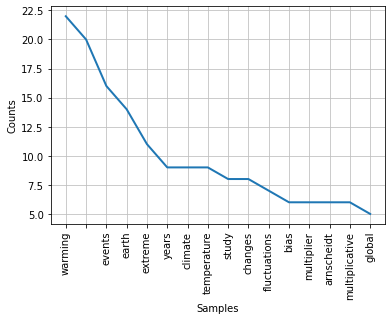

FreqDist({'warming': 22, '\n\n': 20, 'events': 16, 'earth': 14, 'extreme': 11, 'years': 9, 'climate': 9, 'temperature': 9, 'study': 8, 'changes': 8, ...})

In [169]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from nltk import FreqDist

def plotFreqDist(text : str, topN : int = 0) -> None:
    
    nlp = spacy.load('en_core_web_sm')
    
    doc = nlp(text)
    
    fd = FreqDist([word.text.lower() for word in doc if word.text.lower() not in list(STOP_WORDS) and word.text not in punctuation])
  
    if (topN > 0) :
        fd.plot(topN)
    else:
        fd.plot()
    
    return fd

plotFreqDist(text, 16)

Now we define a function for Extractive Summarization. 


In [170]:
from heapq import nlargest
    
def summarize(text : str, percent : float) -> str:
    nlp = spacy.load('en_core_web_sm')
    
    doc = nlp(text)
    
    fd = FreqDist([word.text.lower() for word in doc if word.text.lower() not in list(STOP_WORDS) and word.text not in punctuation])
    
    # weighted word freq
    max_frequency=max(fd.values())
    for word in fd.keys():
        fd[word] = fd[word] / max_frequency
    
    # score sentences
    sentence_tokens= [sent for sent in doc.sents]
    sentence_scores = {}
    for sent in sentence_tokens:
        for word in sent:
            lowerWord = word.text.lower()
            if lowerWord in fd.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=fd[lowerWord]
                else:
                    sentence_scores[sent]+=fd[lowerWord]
    
    # compute numner of sentences to select
    select_count = int(len(sentence_tokens) * percent)
    
    # select n highest score sentences
    summary = nlargest(select_count, sentence_scores, key = sentence_scores.get)
    
    # extract text
    summary_text = [sent.text for sent in summary]
    
    summary=' '.join(summary_text)
    return summary

In [171]:
text = """
It is increasingly clear that the prolonged drought conditions, record-breaking heat, sustained wildfires, and frequent, more extreme storms experienced in recent years are a direct result of rising global temperatures brought on by humans' addition of carbon dioxide to the atmosphere. And a new MIT study on extreme climate events in Earth's ancient history suggests that today's planet may become more volatile as it continues to warm.

The study, appearing today in Science Advances, examines the paleoclimate record of the last 66 million years, during the Cenozoic era, which began shortly after the extinction of the dinosaurs. The scientists found that during this period, fluctuations in the Earth's climate experienced a surprising "warming bias." In other words, there were far more warming events -- periods of prolonged global warming, lasting thousands to tens of thousands of years -- than cooling events. What's more, warming events tended to be more extreme, with greater shifts in temperature, than cooling events.

The researchers say a possible explanation for this warming bias may lie in a "multiplier effect," whereby a modest degree of warming -- for instance from volcanoes releasing carbon dioxide into the atmosphere -- naturally speeds up certain biological and chemical processes that enhance these fluctuations, leading, on average, to still more warming.

Interestingly, the team observed that this warming bias disappeared about 5 million years ago, around the time when ice sheets started forming in the Northern Hemisphere. It's unclear what effect the ice has had on the Earth's response to climate shifts. But as today's Arctic ice recedes, the new study suggests that a multiplier effect may kick back in, and the result may be a further amplification of human-induced global warming.

"The Northern Hemisphere's ice sheets are shrinking, and could potentially disappear as a long-term consequence of human actions" says the study's lead author Constantin Arnscheidt, a graduate student in MIT's Department of Earth, Atmospheric and Planetary Sciences. "Our research suggests that this may make the Earth's climate fundamentally more susceptible to extreme, long-term global warming events such as those seen in the geologic past."

Arnscheidt's study co-author is Daniel Rothman, professor of geophysics at MIT, and co-founder and co-director of MIT's Lorenz Center.

A volatile push

For their analysis, the team consulted large databases of sediments containing deep-sea benthic foraminifera -- single-celled organisms that have been around for hundreds of millions of years and whose hard shells are preserved in sediments. The composition of these shells is affected by the ocean temperatures as organisms are growing; the shells are therefore considered a reliable proxy for the Earth's ancient temperatures.

For decades, scientists have analyzed the composition of these shells, collected from all over the world and dated to various time periods, to track how the Earth's temperature has fluctuated over millions of years.

"When using these data to study extreme climate events, most studies have focused on individual large spikes in temperature, typically of a few degrees Celsius warming," Arnscheidt says. "Instead, we tried to look at the overall statistics and consider all the fluctuations involved, rather than picking out the big ones."

The team first carried out a statistical analysis of the data and observed that, over the last 66 million years, the distribution of global temperature fluctuations didn't resemble a standard bell curve, with symmetric tails representing an equal probability of extreme warm and extreme cool fluctuations. Instead, the curve was noticeably lopsided, skewed toward more warm than cool events. The curve also exhibited a noticeably longer tail, representing warm events that were more extreme, or of higher temperature, than the most extreme cold events.

"This indicates there's some sort of amplification relative to what you would otherwise have expected," Arnscheidt says. "Everything's pointing to something fundamental that's causing this push, or bias toward warming events."

"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.

A warming multiplier

The team wondered whether this warming bias might have been a result of "multiplicative noise" in the climate-carbon cycle. Scientists have long understood that higher temperatures, up to a point, tend to speed up biological and chemical processes. Because the carbon cycle, which is a key driver of long-term climate fluctuations, is itself composed of such processes, increases in temperature may lead to larger fluctuations, biasing the system towards extreme warming events.

In mathematics, there exists a set of equations that describes such general amplifying, or multiplicative effects. The researchers applied this multiplicative theory to their analysis to see whether the equations could predict the asymmetrical distribution, including the degree of its skew and the length of its tails.

In the end, they found that the data, and the observed bias toward warming, could be explained by the multiplicative theory. In other words, it's very likely that, over the last 66 million years, periods of modest warming were on average further enhanced by multiplier effects, such as the response of biological and chemical processes that further warmed the planet.

As part of the study, the researchers also looked at the correlation between past warming events and changes in Earth's orbit. Over hundreds of thousands of years, Earth's orbit around the sun regularly becomes more or less elliptical. But scientists have wondered why many past warming events appeared to coincide with these changes, and why these events feature outsized warming compared with what the change in Earth's orbit could have wrought on its own.

So, Arnscheidt and Rothman incorporated the Earth's orbital changes into the multiplicative model and their analysis of Earth's temperature changes, and found that multiplier effects could predictably amplify, on average, the modest temperature rises due to changes in Earth's orbit.

"Climate warms and cools in synchrony with orbital changes, but the orbital cycles themselves would predict only modest changes in climate," Rothman says. "But if we consider a multiplicative model, then modest warming, paired with this multiplier effect, can result in extreme events that tend to occur at the same time as these orbital changes."

"Humans are forcing the system in a new way," Arnscheidt adds. "And this study is showing that, when we increase temperature, we're likely going to interact with these natural, amplifying effects."
"""

summarize(text, 0.05)

'The researchers say a possible explanation for this warming bias may lie in a "multiplier effect," whereby a modest degree of warming -- for instance from volcanoes releasing carbon dioxide into the atmosphere -- naturally speeds up certain biological and chemical processes that enhance these fluctuations, leading, on average, to still more warming. So, Arnscheidt and Rothman incorporated the Earth\'s orbital changes into the multiplicative model and their analysis of Earth\'s temperature changes, and found that multiplier effects could predictably amplify, on average, the modest temperature rises due to changes in Earth\'s orbit.'

Do you agree that the summary looks quite good? What drawbacks do you see with the Extractive Summary approach? 

Let's illustrate one drawback of the approach - repetition trumps all (pun intended).

In [177]:
text2 = """
It is increasingly clear that the prolonged drought conditions, record-breaking heat, sustained wildfires, and frequent, more extreme storms experienced in recent years are a direct result of rising global temperatures brought on by humans' addition of carbon dioxide to the atmosphere. And a new MIT study on extreme climate events in Earth's ancient history suggests that today's planet may become more volatile as it continues to warm.

The study, appearing today in Science Advances, examines the paleoclimate record of the last 66 million years, during the Cenozoic era, which began shortly after the extinction of the dinosaurs. The scientists found that during this period, fluctuations in the Earth's climate experienced a surprising "warming bias." In other words, there were far more warming events -- periods of prolonged global warming, lasting thousands to tens of thousands of years -- than cooling events. What's more, warming events tended to be more extreme, with greater shifts in temperature, than cooling events.

The researchers say a possible explanation for this warming bias may lie in a "multiplier effect," whereby a modest degree of warming -- for instance from volcanoes releasing carbon dioxide into the atmosphere -- naturally speeds up certain biological and chemical processes that enhance these fluctuations, leading, on average, to still more warming.

Interestingly, the team observed that this warming bias disappeared about 5 million years ago, around the time when ice sheets started forming in the Northern Hemisphere. It's unclear what effect the ice has had on the Earth's response to climate shifts. But as today's Arctic ice recedes, the new study suggests that a multiplier effect may kick back in, and the result may be a further amplification of human-induced global warming.

"The Northern Hemisphere's ice sheets are shrinking, and could potentially disappear as a long-term consequence of human actions" says the study's lead author Constantin Arnscheidt, a graduate student in MIT's Department of Earth, Atmospheric and Planetary Sciences. "Our research suggests that this may make the Earth's climate fundamentally more susceptible to extreme, long-term global warming events such as those seen in the geologic past."

Arnscheidt's study co-author is Daniel Rothman, professor of geophysics at MIT, and co-founder and co-director of MIT's Lorenz Center.

A volatile push

For their analysis, the team consulted large databases of sediments containing deep-sea benthic foraminifera -- single-celled organisms that have been around for hundreds of millions of years and whose hard shells are preserved in sediments. The composition of these shells is affected by the ocean temperatures as organisms are growing; the shells are therefore considered a reliable proxy for the Earth's ancient temperatures.

For decades, scientists have analyzed the composition of these shells, collected from all over the world and dated to various time periods, to track how the Earth's temperature has fluctuated over millions of years.

"When using these data to study extreme climate events, most studies have focused on individual large spikes in temperature, typically of a few degrees Celsius warming," Arnscheidt says. "Instead, we tried to look at the overall statistics and consider all the fluctuations involved, rather than picking out the big ones."

The team first carried out a statistical analysis of the data and observed that, over the last 66 million years, the distribution of global temperature fluctuations didn't resemble a standard bell curve, with symmetric tails representing an equal probability of extreme warm and extreme cool fluctuations. Instead, the curve was noticeably lopsided, skewed toward more warm than cool events. The curve also exhibited a noticeably longer tail, representing warm events that were more extreme, or of higher temperature, than the most extreme cold events.

"This indicates there's some sort of amplification relative to what you would otherwise have expected," Arnscheidt says. "Everything's pointing to something fundamental that's causing this push, or bias toward warming events."

"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.
"It's fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.

A warming multiplier

The team wondered whether this warming bias might have been a result of "multiplicative noise" in the climate-carbon cycle. Scientists have long understood that higher temperatures, up to a point, tend to speed up biological and chemical processes. Because the carbon cycle, which is a key driver of long-term climate fluctuations, is itself composed of such processes, increases in temperature may lead to larger fluctuations, biasing the system towards extreme warming events.

In mathematics, there exists a set of equations that describes such general amplifying, or multiplicative effects. The researchers applied this multiplicative theory to their analysis to see whether the equations could predict the asymmetrical distribution, including the degree of its skew and the length of its tails.

In the end, they found that the data, and the observed bias toward warming, could be explained by the multiplicative theory. In other words, it's very likely that, over the last 66 million years, periods of modest warming were on average further enhanced by multiplier effects, such as the response of biological and chemical processes that further warmed the planet.

As part of the study, the researchers also looked at the correlation between past warming events and changes in Earth's orbit. Over hundreds of thousands of years, Earth's orbit around the sun regularly becomes more or less elliptical. But scientists have wondered why many past warming events appeared to coincide with these changes, and why these events feature outsized warming compared with what the change in Earth's orbit could have wrought on its own.

So, Arnscheidt and Rothman incorporated the Earth's orbital changes into the multiplicative model and their analysis of Earth's temperature changes, and found that multiplier effects could predictably amplify, on average, the modest temperature rises due to changes in Earth's orbit.

"Climate warms and cools in synchrony with orbital changes, but the orbital cycles themselves would predict only modest changes in climate," Rothman says. "But if we consider a multiplicative model, then modest warming, paired with this multiplier effect, can result in extreme events that tend to occur at the same time as these orbital changes."

"Humans are forcing the system in a new way," Arnscheidt adds. "And this study is showing that, when we increase temperature, we're likely going to interact with these natural, amplifying effects."
"""

summarize(text2, 0.05)

'So, Arnscheidt and Rothman incorporated the Earth\'s orbital changes into the multiplicative model and their analysis of Earth\'s temperature changes, and found that multiplier effects could predictably amplify, on average, the modest temperature rises due to changes in Earth\'s orbit. The researchers say a possible explanation for this warming bias may lie in a "multiplier effect," whereby a modest degree of warming -- for instance from volcanoes releasing carbon dioxide into the atmosphere -- naturally speeds up certain biological and chemical processes that enhance these fluctuations, leading, on average, to still more warming. \n\n"It\'s fair to say that the Earth system becomes more volatile, in a warming sense," Rothman adds.'

# Word Embedding

Word embedding in NLP is an important term that is used for representing words for text analysis in the form of real-valued vectors. It is considered one of the most significant breakthroughs of deep learning for solving challenging natural language processing problems. Each word is represented by a real-valued vector with tens or hundreds of dimensions.

Spacy encodes each token as a 300 dimension vector.


In [196]:
nlp = spacy.load('en_core_web_lg')       # contains 685K unique vectors

doc0 = nlp("The flight is late.")
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

doc3 = nlp("King and Queen.")
doc4 = nlp("Man and Woman")

# Similarity of two documents
print(doc0, "<->", doc1, doc0.similarity(doc1))
print(doc1, "<->", doc2, doc1.similarity(doc2))

# Similarity of tokens and spans
king = doc3[0:1]
queen = doc3[2:3]
print(king, "<->", queen, king.similarity(queen))

man = doc4[0:1]
woman = doc4[2:3]
print(man, "<->", woman, man.similarity(woman))

print(king, "<->", man, king.similarity(man))
print(king, "<->", woman, king.similarity(woman))


The flight is late. <-> I like salty fries and hamburgers. 0.5306673848303783
I like salty fries and hamburgers. <-> Fast food tastes very good. 0.7687607012190486
King <-> Queen 0.7252610325813293
Man <-> Woman 0.7401744723320007
King <-> Man 0.4088461101055145
King <-> Woman 0.2655659317970276


# Conclusion

This was a short tour of NLP and barely scratches the surface of this vast field. machine translation, sentiment analysis, classification, text summarization, automatic text generation, etc. are used widely within industry and are also active reseach topics.

Note: unstructured data from one industry (e.g. Pharma) typically varies substantially from another (e.g. Finance). Training industry specific language deep learning models depends on the availability of high-quality data.  

This is usually the biggest differentiator amongst service providers using NLP - the quantity and quality of data that has been cleaned and (hand) annotated by domain experts.